In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from efficient_apriori import apriori

In [2]:
#读取表格
order_data=pd.read_csv("D://Data_anasyls//ProjectB/订单表.csv",encoding='gbk')

In [3]:
order_data.head

<bound method NDFrame.head of             订单日期    年份  订单数量  产品ID              产品型号名称   产品名称 产品类别    单价  \
0       2016/1/1  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
1       2016/1/2  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
2       2016/1/2  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
3       2016/1/5  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
4       2016/1/6  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
...          ...   ...   ...   ...                 ...    ...  ...   ...   
60393  2016/7/28  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
60394  2016/7/29  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
60395  2016/7/29  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
60396  2016/7/30  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   
60397  2016/7/30  2016     1   528  Mountain Tire Tube  车胎和内胎   配件  4.99   

       销售金额    产品成本      利润   客户ID  交易类型  销售区域ID 销售大区  国家

In [4]:
#根据id将产品名称分组，可以获得每一个ID购买的产品种类，使用了unique函数
grouped_by_id=order_data["产品名称"].groupby([order_data["客户ID"]]).unique()

In [5]:
transactions = list(grouped_by_id.values)

In [6]:
itemsets,rules= apriori(transactions,min_support=0.03,min_confidence=0.1,max_length=2)

In [7]:
for itemset in itemsets.items():
    print("----------------------------------")
    print(itemset[0])
    sorted_itemset=sorted(itemset[1].items(),key=lambda x: x[1],reverse=True)
    print("频繁项集排序:\n",sorted_itemset)
print("----------------------------------")
print("关联规则：\n", rules)

----------------------------------
1
频繁项集排序:
 [(('车胎和内胎',), 8490), (('公路自行车',), 6397), (('头盔',), 5960), (('水壶和水壶架',), 4548), (('山地自行车',), 4089), (('骑行服',), 3192), (('旅行自行车',), 2143), (('帽子',), 2132), (('挡泥板',), 2110), (('手套',), 1376), (('短裤',), 1019), (('清洁剂',), 875), (('水袋背包',), 719), (('袜子',), 559), (('背心',), 557)]
----------------------------------
2
频繁项集排序:
 [(('头盔', '车胎和内胎'), 2921), (('公路自行车', '山地自行车'), 2053), (('公路自行车', '头盔'), 2051), (('公路自行车', '水壶和水壶架'), 1590), (('头盔', '水壶和水壶架'), 1453), (('公路自行车', '车胎和内胎'), 1450), (('头盔', '山地自行车'), 1388), (('山地自行车', '旅行自行车'), 1246), (('山地自行车', '水壶和水壶架'), 1246), (('公路自行车', '骑行服'), 1154), (('车胎和内胎', '骑行服'), 1150), (('山地自行车', '车胎和内胎'), 1107), (('头盔', '旅行自行车'), 1058), (('头盔', '骑行服'), 923), (('山地自行车', '挡泥板'), 898), (('水壶和水壶架', '车胎和内胎'), 812), (('旅行自行车', '水壶和水壶架'), 780), (('水壶和水壶架', '骑行服'), 774), (('帽子', '车胎和内胎'), 760), (('帽子', '水壶和水壶架'), 746), (('头盔', '挡泥板'), 742), (('挡泥板', '车胎和内胎'), 723), (('帽子', '骑行服'), 689), (('头盔', '手套'), 687), (('山地自行车', '骑行服'),

In [8]:
#这个可以查询到每个产品的销售总金额
grouped_by_xiaoshoue=order_data["销售金额"].groupby([order_data["产品名称"]]).sum()

In [9]:
#可以返回同时购买两个物品的人员ID的函数
def ID_both_buy(set_both):
    temp_id=[]
    for k,v in grouped_by_id.items():
        if set_both.issubset(set(v)):
            temp_id.append(k)
    return temp_id

In [10]:
#一个根据人员ID（数组）获取销售金额的函数
def get_sum(dataframe,Kehu_ID,Mingzi):
    sum_xiaoshou=0
    for item in Kehu_ID:
        some=dataframe[(dataframe["客户ID"]==item)&(dataframe["产品名称"]==Mingzi)]
        some_num=some["销售金额"].sum()
        sum_xiaoshou+=some_num
    return sum_xiaoshou

In [11]:
#测试为公路自行车为产品B
productB="公路自行车"
test=tuple((productB,))
print(productB,"与其他产品的交集")
print("x"*50)
new_df=pd.DataFrame(columns=("产品B名称","产品A名称","产品A客户数","产品A销售额","同时买A和B数量","产品B销售额","关联客户比"))
for k,v in itemsets[1].items():
    new_tuple=test+tuple(k)
    for k1,v1 in itemsets[2].items():
        if set(new_tuple)==set(k1):
            #print(k,v)
            A_sales_sum=grouped_by_xiaoshoue[k[0]]
            #获取同时买两个物品的人员的ID
            ID_person=ID_both_buy(set(new_tuple))
            #通过ID获得B物品的销售额
            B_sales_sum=get_sum(order_data,ID_person,"公路自行车")
            
            print("{:<25s} {:<}".format("A产品的客户数",v))
            print("{:<25s} {:<10s}".format("A产品的名称",k[0]))
            print("{:<25s} {:.2f}".format("产品A的销售额",A_sales_sum))
            print("{:<25s} {:<10s}".format("A产品的名称",k[0]))
            print("{:<25s} {:<}".format("购买A的客户购买B的客户数",v1))
            print("{:<25s} {:.2f}".format("购买A的客户购买B的金额",B_sales_sum))
            print("{:<25s} {:.2f}".format("客户占比",v1/v))
            print("-"*50)
            new_df=new_df.append([{"产品B名称":productB,"产品A名称":k[0],"产品A客户数":v,"产品A销售额":A_sales_sum,"同时买A和B数量":v1,"产品B销售额":B_sales_sum,"关联客户比":v1/v}],ignore_index=True)

公路自行车 与其他产品的交集
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
A产品的客户数                   3192
A产品的名称                    骑行服       
产品A的销售额                   172950.68
A产品的名称                    骑行服       
购买A的客户购买B的客户数             1154
购买A的客户购买B的金额              2456371.25
客户占比                      0.36
--------------------------------------------------
A产品的客户数                   5960
A产品的名称                    头盔        
产品A的销售额                   225335.60
A产品的名称                    头盔        
购买A的客户购买B的客户数             2051
购买A的客户购买B的金额              4659745.50
客户占比                      0.34
--------------------------------------------------
A产品的客户数                   8490
A产品的名称                    车胎和内胎     
产品A的销售额                   245529.32
A产品的名称                    车胎和内胎     
购买A的客户购买B的客户数             1450
购买A的客户购买B的金额              3370199.18
客户占比                      0.17
--------------------------------------------------
A产品的客户数                   4089
A产品的名称                    山地自行

In [12]:
new_df

,产品B名称,产品A名称,产品A客户数,产品A销售额,同时买A和B数量,产品B销售额,关联客户比
0,公路自行车,骑行服,3192,1.729507e+05,1154,2.456371e+06,0.361529
1,公路自行车,头盔,5960,2.253356e+05,2051,4.659746e+06,0.344128
2,公路自行车,车胎和内胎,8490,2.455293e+05,1450,3.370199e+06,0.170789
3,公路自行车,山地自行车,4089,9.952760e+06,2053,4.660287e+06,0.502079
4,公路自行车,帽子,2132,1.968810e+04,673,1.447043e+06,0.315666
5,公路自行车,水壶和水壶架,4548,5.679819e+04,1590,3.486133e+06,0.349604


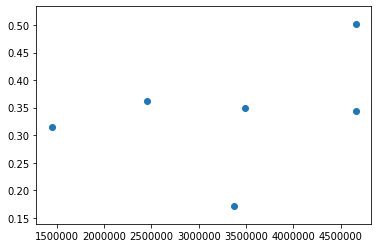

In [13]:
plt.scatter(new_df["产品B销售额"],new_df["关联客户比"])